---
title: "Group Project"
output: pdf_document
date: "2024-03-29"
---

# Data Processing

In [12]:
travel <- read.csv("TravelTrain.csv", header=T, sep=",")
survey <- read.csv("SurveyTrain.csv", header=T, sep=",")
full <- merge(survey,travel,by.x="ID",by.y="ID")
nonfactors = c("ID", "Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")
factors = -which(names(full) %in% nonfactors)
full[, factors] = lapply(full[, factors], as.factor)
head(full)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,98800004,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,...,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


In [13]:
num_rows_with_na <- sum(apply(full, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 390

In [14]:
full_complete <- na.omit(full)
head(full_complete)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,98800004,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,...,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


In [15]:
num_rows_with_na <- sum(apply(full_complete, 1, function(row) any(is.na(row))))
num_rows_with_na

[1] 0

In [16]:
full_complete <- full_complete[ , !(names(full_complete) %in% c("ID"))]
head(full_complete)

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,...,need improvement,poor,Female,Loyal Customer,52,,Business,272,0,5
2,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,...,good,good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9,0
3,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,...,excellent,excellent,Female,Loyal Customer,43,Business travel,Business,1061,77,119
4,0,acceptable,Ordinary,need improvement,,need improvement,acceptable,need improvement,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44,Business travel,Business,780,13,18
5,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,...,good,good,Female,Loyal Customer,50,Business travel,Business,1981,0,0
6,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,acceptable,...,acceptable,acceptable,Male,Loyal Customer,44,Business travel,Business,2810,0,0


# Feature Selection

Our model involves 25 variables (including categorical and continous variables). Of which, the categorical variables involve 5-7 different levels of categories. Our overall data, after processing, involves over 90000 rows. This makes our model significantly complex. 

Therefore, we'll first conduct feature selection to reduce model complexity.

In [17]:
set.seed(123) # For reproducibility
sample_frac <- 0.1
full_sampled <- full_complete[sample(nrow(full_complete), size = floor(nrow(full_complete) * sample_frac)), ]

In [18]:
full_sampled

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
51883,0,need improvement,Green Car,need improvement,need improvement,manageable,excellent,need improvement,good,excellent,...,good,excellent,Female,disloyal Customer,36,Business travel,Business,2200,37,40
58120,0,good,Ordinary,acceptable,acceptable,manageable,good,acceptable,good,good,...,good,good,Male,Loyal Customer,30,Business travel,Eco,2410,18,8
3006,1,good,Green Car,good,good,need improvement,need improvement,good,need improvement,need improvement,...,good,need improvement,Male,disloyal Customer,39,Business travel,Business,2696,0,0
30044,1,poor,Green Car,poor,,Inconvinient,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,Loyal Customer,29,Business travel,Business,2781,6,0
68584,0,good,Ordinary,poor,good,Convinient,poor,good,poor,poor,...,good,poor,Male,Loyal Customer,29,,Eco,2143,0,0
62823,1,excellent,Green Car,excellent,excellent,very convinient,good,good,good,good,...,good,acceptable,Male,,50,Business travel,Business,3752,0,0
45597,1,good,Green Car,good,excellent,Convinient,good,good,good,good,...,good,good,Female,Loyal Customer,19,Business travel,Business,3760,32,15
65443,0,need improvement,Ordinary,excellent,excellent,very convinient,excellent,good,good,need improvement,...,need improvement,good,Male,Loyal Customer,47,Business travel,Business,201,0,0
46631,1,poor,Ordinary,,acceptable,Inconvinient,good,excellent,good,need improvement,...,need improvement,excellent,Male,Loyal Customer,39,Business travel,Business,3145,0,0


In [19]:
# Function to calculate Chi-squared test and Cramér's V for all pairs of categorical variables
association_test <- function(data) {
  cat_vars <- sapply(data, is.factor)  # Identify categorical variables
  cat_combinations <- combn(names(cat_vars)[cat_vars], 2)  # Get all combinations of categorical variables
  
  # Initialize an empty data frame to store the results
  results <- data.frame(Var1 = character(), Var2 = character(), Chi_Squared = numeric(), P_Value = numeric(), Cramers_V = numeric(), stringsAsFactors = FALSE)
  
  # Loop over all combinations
  for(i in 1:ncol(cat_combinations)) {
    var1 <- cat_combinations[1, i]
    var2 <- cat_combinations[2, i]
    
    # Create contingency table
    table <- table(data[[var1]], data[[var2]])
    
    # Perform the Chi-squared test
    test <- tryCatch(chisq.test(table), error = function(e) return(e))
    
    # If the test was successful, calculate Cramér's V
    if(!inherits(test, "error")) {
      v <- sqrt(test$statistic / (sum(table) * (min(nrow(table), ncol(table)) - 1)))
    } else {
      v <- NA  # Set to NA if the test failed
    }
    
    # Append the results to the results data frame
    results <- rbind(results, data.frame(Var1 = var1, Var2 = var2, Chi_Squared = if(!is.na(v)) test$statistic else NA, P_Value = if(!is.na(v)) test$p.value else NA, Cramers_V = v))
  }
  
  return(results)
}

# Run the function on your dataset (replace 'your_data_frame' with the name of your actual data frame)
association_results <- association_test(full_sampled)

Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warn

In [20]:
association_results

,Var1,Var2,Chi_Squared,P_Value,Cramers_V
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
X-squared,Overall_Experience,Seat_comfort,NA,NA,NaN
X-squared1,Overall_Experience,Seat_Class,0.3558417,5.508247e-01,0.006153337
X-squared2,Overall_Experience,Arrival_time_convenient,13.5929257,3.452912e-02,0.038031088
X-squared3,Overall_Experience,Catering,618.0773194,2.937796e-130,0.256450579
X-squared4,Overall_Experience,Platform_location,NA,NA,NaN
X-squared5,Overall_Experience,Onboardwifi_service,529.2869303,4.115076e-111,0.237316462
X-squared6,Overall_Experience,Onboard_entertainment,3808.0624422,0.000000e+00,0.636552620
X-squared7,Overall_Experience,Online_support,NA,NA,NaN
X-squared8,Overall_Experience,Onlinebooking_Ease,1806.3509506,0.000000e+00,0.438412921


In [21]:
association_results <- association_results[!is.nan(association_results$Cramers_V) & association_results$Cramers_V >= 0.25, ]
association_results

,Var1,Var2,Chi_Squared,P_Value,Cramers_V
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
X-squared3,Overall_Experience,Catering,618.0773,2.937796e-130,0.2564506
X-squared6,Overall_Experience,Onboard_entertainment,3808.0624,0.000000e+00,0.6365526
X-squared8,Overall_Experience,Onlinebooking_Ease,1806.3510,0.000000e+00,0.4384129
X-squared10,Overall_Experience,Leg_room,992.2061,4.335564e-211,0.3249251
X-squared11,Overall_Experience,Baggage_handling,857.7691,3.666017e-183,0.3021117
X-squared16,Overall_Experience,CustomerType,718.9507,7.617873e-157,0.2765871
X-squared18,Overall_Experience,Travel_Class,927.8679,8.585566e-204,0.3142139
X-squared54,Arrival_time_convenient,Catering,11754.2662,0.000000e+00,0.4565669
X-squared72,Catering,Onboard_entertainment,8717.1552,0.000000e+00,0.3931824


In [22]:
numerical_data <- full_sampled[c("Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")]
correlation_matrix <- cor(numerical_data, use="complete.obs")  # use="complete.obs" to handle missing values
correlation_matrix

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
Age,1.000000000,-0.2553502,0.003081416,0.005747269
Travel_Distance,-0.255350203,1.0000000,0.107836205,0.105132518
DepartureDelay_in_Mins,0.003081416,0.1078362,1.000000000,0.967571942
ArrivalDelay_in_Mins,0.005747269,0.1051325,0.967571942,1.000000000


# Principal Component Analysis

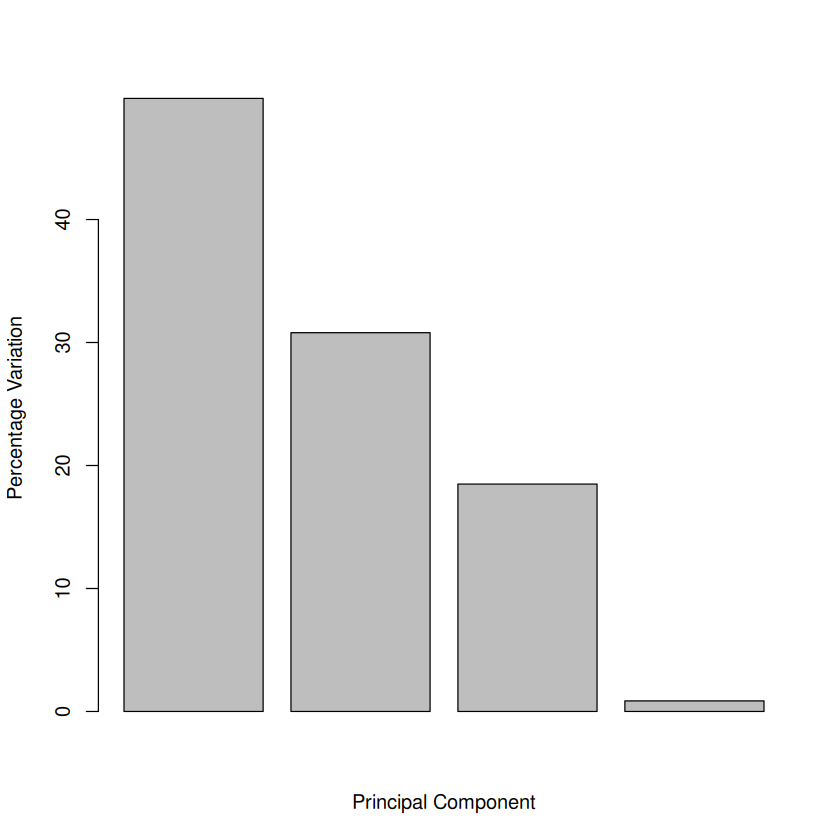

In [23]:
numcols = full_complete[, c("Age", "Travel_Distance", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins")]
pca <- prcomp(numcols, scale=T)
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var) * 100, 2)
barplot(pca.var.per, xlab="Principal Component", ylab="Percentage Variation")

# Model Selection and Model Fitting

### Fitting a Logistic Regression Model - DO NOT RUN BEFORE SETING UP THE GLM MODEL WITH THE DECIDED PREDICTOR VARIABLES

In [24]:
# Setup model with the decided predictor variables
full_model <- glm(Overall_Experience ~ ., data = full_complete, family = "binomial")
summary(full_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Overall_Experience ~ ., family = "binomial", data = full_complete)

Coefficients: (5 not defined because of singularities)
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.709e-01  2.521e+03   0.000 0.999724
Seat_comfortacceptable                  -1.343e+00  3.963e-01  -3.389 0.000702
Seat_comfortexcellent                    4.549e+00  4.117e-01  11.050  < 2e-16
Seat_comfortextremely poor               2.136e+01  8.538e+01   0.250 0.802446
Seat_comfortgood                        -2.747e-01  3.960e-01  -0.694 0.487927
Seat_comfortneed improvement            -1.294e+00  3.967e-01  -3.263 0.001103
Seat_comfortpoor                        -9.280e-01  3.975e-01  -2.334 0.019572
Seat_ClassOrdinary                       1.195e-02  2.437e-02   0.490 0.623834
Arrival_time_convenientacceptable        5.212e-01  5.393e-02   9.663  < 2e-16
Arrival_time_convenientexcellent        -1.402e+00  5.689e-02 -24.

In [25]:
exp(coef(full_model))

(Intercept)                  Seat_comfortacceptable 
                           4.185543e-01                            2.610903e-01 
                  Seat_comfortexcellent              Seat_comfortextremely poor 
                           9.452378e+01                            1.893036e+09 
                       Seat_comfortgood            Seat_comfortneed improvement 
                           7.598307e-01                            2.740978e-01 
                       Seat_comfortpoor                      Seat_ClassOrdinary 
                           3.953320e-01                            1.012022e+00 
      Arrival_time_convenientacceptable        Arrival_time_convenientexcellent 
                           1.684013e+00                            2.460513e-01 
  Arrival_time_convenientextremely poor             Arrival_time_convenientgood 
                           8.529213e-01                            6.769347e-01 
Arrival_time_convenientneed improvement             Arrival_time_convenientpoor 
                           1.583128e+00                            1.620335e+00 
                     Cateringacceptable                       Cateringexcellent 
                           1.185201e+00                            1.507926e+00 
                 Cateringextremely poor                            Cateringgood 
                           3.180777e-01                            1.055190e+00 
               Cateringneed improvement                            Cateringpoor 
                           8.445070e-01                            8.553788e-01 
            Platform_locationConvinient           Platform_locationInconvinient 
                           5.176686e-01                            5.160590e-01 
            Platform_locationmanageable       Platform_locationneed improvement 
                           3.990757e-01                            5.956917e-01 
       Platform_locationvery convinient      Platform_locationvery inconvinient 
                           4.089995e-01                            2.332285e+08 
          Onboardwifi_serviceacceptable            Onboardwifi_serviceexcellent 
                           1.199671e+00                            8.758048e-01 
      Onboardwifi_serviceextremely poor                 Onboardwifi_servicegood 
                           1.125896e-01                            1.074858e+00 
    Onboardwifi_serviceneed improvement                 Onboardwifi_servicepoor 
                           1.416826e+00                                      NA 
        Onboard_entertainmentacceptable          Onboard_entertainmentexcellent 
                           6.309011e+00                            1.407040e+02 
    Onboard_entertainmentextremely poor               Onboard_entertainmentgood 
                           1.321418e+01                            4.094408e+01 
  Onboard_entertainmentneed improvement               Onboard_entertainmentpoor 
                           7.301816e+00                            6.587542e+00 
               Online_supportacceptable                 Online_supportexcellent 
                           1.829818e-02                            7.433127e-02 
           Online_supportextremely poor                      Online_supportgood 
                           4.210219e-10                            4.011363e-02 
         Online_supportneed improvement                      Online_supportpoor 
                           5.272911e-02                            7.331607e-02 
           Onlinebooking_Easeacceptable             Onlinebooking_Easeexcellent 
                           6.272383e+00                            3.971429e+00 
       Onlinebooking_Easeextremely poor                  Onlinebooking_Easegood 
                           2.416823e-15                            8.731886e+00 
     Onlinebooking_Easeneed improvement                  Onlinebooking_Easepoor 
                           2.541732e+00                    

### Model Selection using AIC and Forward Selection

In [26]:
install.packages("MASS")
library(MASS)

Installing package into ‘/home/tkwong/R/x86_64-redhat-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked _by_ ‘.GlobalEnv’:

    survey




In [27]:
stepwise_model <- stepAIC(full_model, direction = "both")
summary(stepwise_model)

Start:  AIC=45032.18
Overall_Experience ~ Seat_comfort + Seat_Class + Arrival_time_convenient + 
    Catering + Platform_location + Onboardwifi_service + Onboard_entertainment + 
    Online_support + Onlinebooking_Ease + Onboard_service + Leg_room + 
    Baggage_handling + Checkin_service + Cleanliness + Online_boarding + 
    Gender + CustomerType + Age + TypeTravel + Travel_Class + 
    Travel_Distance + DepartureDelay_in_Mins + ArrivalDelay_in_Mins



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance   AIC
- Seat_Class               1    44850 45030
<none>                          44850 45032
- Age                      1    44854 45034
- DepartureDelay_in_Mins   1    44855 45035
- Travel_Distance          1    44878 45058
- ArrivalDelay_in_Mins     1    44889 45069
- Onboardwifi_service      5    44954 45126
- Platform_location        5    44956 45128
- Catering                 6    44966 45136
- Online_boarding          4    44968 45142
- Baggage_handling         5    45298 45470
- Cleanliness              4    45299 45473
- Onboard_service          6    45362 45532
- Travel_Class             1    45450 45630
- Checkin_service          5    45473 45645
- Leg_room                 6    45584 45754
- TypeTravel               2    45709 45887
- Onlinebooking_Ease       4    45826 46000
- Online_support           4    45896 46070
- Gender                   2    46130 46308
- Arrival_time_convenient  6    46529 46699
- CustomerType             2    

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=45030.42
Overall_Experience ~ Seat_comfort + Arrival_time_convenient + 
    Catering + Platform_location + Onboardwifi_service + Onboard_entertainment + 
    Online_support + Onlinebooking_Ease + Onboard_service + Leg_room + 
    Baggage_handling + Checkin_service + Cleanliness + Online_boarding + 
    Gender + CustomerType + Age + TypeTravel + Travel_Class + 
    Travel_Distance + DepartureDelay_in_Mins + ArrivalDelay_in_Mins



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                          Df Deviance   AIC
<none>                          44850 45030
+ Seat_Class               1    44850 45032
- Age                      1    44854 45032
- DepartureDelay_in_Mins   1    44855 45033
- Travel_Distance          1    44878 45056
- ArrivalDelay_in_Mins     1    44889 45067
- Onboardwifi_service      5    44954 45124
- Platform_location        5    44956 45126
- Catering                 6    44966 45134
- Online_boarding          4    44969 45141
- Baggage_handling         5    45298 45468
- Cleanliness              4    45300 45472
- Onboard_service          6    45363 45531
- Travel_Class             1    45450 45628
- Checkin_service          5    45474 45644
- Leg_room                 6    45584 45752
- TypeTravel               2    45709 45885
- Onlinebooking_Ease       4    45826 45998
- Online_support           4    45896 46068
- Gender                   2    46130 46306
- Arrival_time_convenient  6    46529 46697
- CustomerType             2    


Call:
glm(formula = Overall_Experience ~ Seat_comfort + Arrival_time_convenient + 
    Catering + Platform_location + Onboardwifi_service + Onboard_entertainment + 
    Online_support + Onlinebooking_Ease + Onboard_service + Leg_room + 
    Baggage_handling + Checkin_service + Cleanliness + Online_boarding + 
    Gender + CustomerType + Age + TypeTravel + Travel_Class + 
    Travel_Distance + DepartureDelay_in_Mins + ArrivalDelay_in_Mins, 
    family = "binomial", data = full_complete)

Coefficients: (5 not defined because of singularities)
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.702e-01  2.521e+03   0.000 0.999725
Seat_comfortacceptable                  -1.343e+00  3.963e-01  -3.389 0.000702
Seat_comfortexcellent                    4.548e+00  4.117e-01  11.049  < 2e-16
Seat_comfortextremely poor               2.136e+01  8.537e+01   0.250 0.802390
Seat_comfortgood                        -2.746e-01  3.960

Let's regularize the model since we have too many predictors.

In [28]:
AIC(full_model, stepwise_model, k = 2)  # k = 2 is the default for AIC

,df,AIC
,<dbl>,<dbl>
full_model,91,45032.18
stepwise_model,90,45030.42


In [33]:
# Check for potential interactions between categorical variables
# Here's an example of adding an interaction term between two variables
interaction_model <- glm(Overall_Experience ~ . + Online_support * Travel_Distance, data = full, family = binomial())

# Compare the AIC of the interaction model with the previous models
AIC(full_model, stepwise_model, interaction_model, k = 2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,df,AIC
,<dbl>,<dbl>
full_model,91,45032.18
stepwise_model,90,45030.42
interaction_model,97,44972.30


### Model Analysis

Warning message:
“not plotting observations with leverage one:
  6082, 28848”


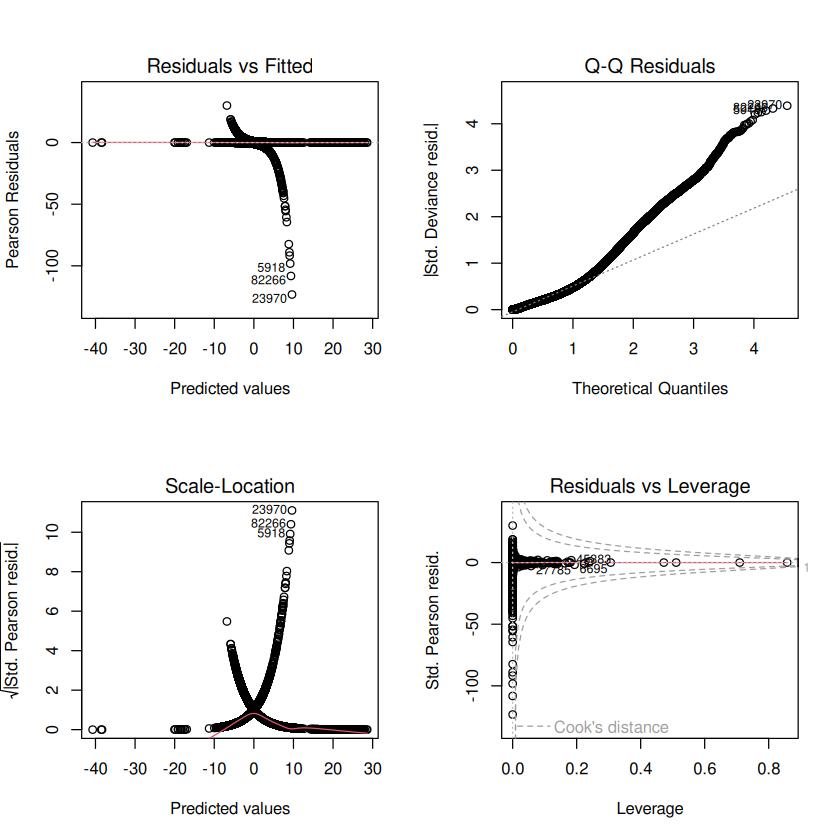

In [34]:
par(mfrow = c(2, 2))
plot(stepwise_model)

### Cross-Validation

In [35]:
install.packages("caret")
library(caret)

Installing package into ‘/home/tkwong/R/x86_64-redhat-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
control <- trainControl(method = "cv", number = 10)
cv_model <- train(Overall_Experience ~ ., data = full_complete, method = "glm", trControl = control, family = "binomial")

print(cv_model)

In [37]:
summary(stepwise_model)


Call:
glm(formula = Overall_Experience ~ Seat_comfort + Arrival_time_convenient + 
    Catering + Platform_location + Onboardwifi_service + Onboard_entertainment + 
    Online_support + Onlinebooking_Ease + Onboard_service + Leg_room + 
    Baggage_handling + Checkin_service + Cleanliness + Online_boarding + 
    Gender + CustomerType + Age + TypeTravel + Travel_Class + 
    Travel_Distance + DepartureDelay_in_Mins + ArrivalDelay_in_Mins, 
    family = "binomial", data = full_complete)

Coefficients: (5 not defined because of singularities)
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.702e-01  2.521e+03   0.000 0.999725
Seat_comfortacceptable                  -1.343e+00  3.963e-01  -3.389 0.000702
Seat_comfortexcellent                    4.548e+00  4.117e-01  11.049  < 2e-16
Seat_comfortextremely poor               2.136e+01  8.537e+01   0.250 0.802390
Seat_comfortgood                        -2.746e-01  3.960

In [38]:
exp(coef(stepwise_model))

(Intercept)                  Seat_comfortacceptable 
                           4.188819e-01                            2.610880e-01 
                  Seat_comfortexcellent              Seat_comfortextremely poor 
                           9.448615e+01                            1.898902e+09 
                       Seat_comfortgood            Seat_comfortneed improvement 
                           7.598414e-01                            2.740823e-01 
                       Seat_comfortpoor       Arrival_time_convenientacceptable 
                           3.952601e-01                            1.684053e+00 
       Arrival_time_convenientexcellent   Arrival_time_convenientextremely poor 
                           2.460391e-01                            8.528102e-01 
            Arrival_time_convenientgood Arrival_time_convenientneed improvement 
                           6.768494e-01                            1.582969e+00 
            Arrival_time_convenientpoor                      Cateringacceptable 
                           1.620330e+00                            1.184987e+00 
                      Cateringexcellent                  Cateringextremely poor 
                           1.507932e+00                            3.184634e-01 
                           Cateringgood                Cateringneed improvement 
                           1.054963e+00                            8.444422e-01 
                           Cateringpoor             Platform_locationConvinient 
                           8.551486e-01                            5.169767e-01 
          Platform_locationInconvinient             Platform_locationmanageable 
                           5.154315e-01                            3.985245e-01 
      Platform_locationneed improvement        Platform_locationvery convinient 
                           5.949077e-01                            4.084883e-01 
     Platform_locationvery inconvinient           Onboardwifi_serviceacceptable 
                           2.336362e+08                            1.199499e+00 
           Onboardwifi_serviceexcellent       Onboardwifi_serviceextremely poor 
                           8.755862e-01                            1.121657e-01 
                Onboardwifi_servicegood     Onboardwifi_serviceneed improvement 
                           1.074735e+00                            1.416559e+00 
                Onboardwifi_servicepoor         Onboard_entertainmentacceptable 
                                     NA                            6.305090e+00 
         Onboard_entertainmentexcellent     Onboard_entertainmentextremely poor 
                           1.406197e+02                            1.319817e+01 
              Onboard_entertainmentgood   Onboard_entertainmentneed improvement 
                           4.092129e+01                            7.298057e+00 
              Onboard_entertainmentpoor                Online_supportacceptable 
                           6.584843e+00                            1.830539e-02 
                Online_supportexcellent            Online_supportextremely poor 
                           7.437426e-02                            4.222556e-10 
                     Online_supportgood          Online_supportneed improvement 
                           4.013375e-02                            5.275810e-02 
                     Online_supportpoor            Onlinebooking_Easeacceptable 
                           7.333808e-02                            6.272976e+00 
            Onlinebooking_Easeexcellent        Onlinebooking_Easeextremely poor 
                           3.971041e+00                            2.421388e-15 
                 Onlinebooking_Easegood      Onlinebooking_Easeneed improvement 
                           8.730787e+00                            2.541567e+00 
                 Onlinebooking_Easepoor               Onboard_serviceacceptable 
                                     NA                    

In [ ]:
exp(confint(stepwise_model))

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted proba